In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras

In [2]:
path=".//HinhAnh//"
categories = ['PC_BHA','PC_Retinol','Simple_TayTrang','Simple_Toner','Skin1004_KCN','Skin1004_KemDuong','Skin1004_Toner','SkinAqua_KCN']

In [3]:
data = []#dữ liệu
labels = []#nhãn
imagePaths = []
HEIGHT = 128
WIDTH = 128
# 24 24
N_CHANNELS = 3

In [4]:
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) 

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

[['.//HinhAnh//Skin1004_Toner/skin1004Toner (30).jpg', 6], ['.//HinhAnh//Skin1004_KemDuong/vn-11134103-23020-ch2wf03o18mv2f.jpg', 5], ['.//HinhAnh//PC_BHA/b610b4b2b925647b3d34.jpg', 0], ['.//HinhAnh//Skin1004_Toner/76775b48e80133bb415f0bdc99eeb4d2.jpg', 6], ['.//HinhAnh//Simple_TayTrang/vn-11134103-23030-0gtnwtg75cov8f.jpg', 2], ['.//HinhAnh//Skin1004_KemDuong/vn-11134103-23010-b1vivifvmwlvc5.jpg', 5], ['.//HinhAnh//Simple_Toner/dd83273d0f4b5301342e45e70f830e42.jpg', 3], ['.//HinhAnh//Skin1004_KCN/KCN_Skin100438.jpg', 4], ['.//HinhAnh//SkinAqua_KCN/SkinaquaKCN (17).jpg', 7], ['.//HinhAnh//Skin1004_KCN/vn-11134103-23030-bgl1jur6q5nv69.jpg', 4]]


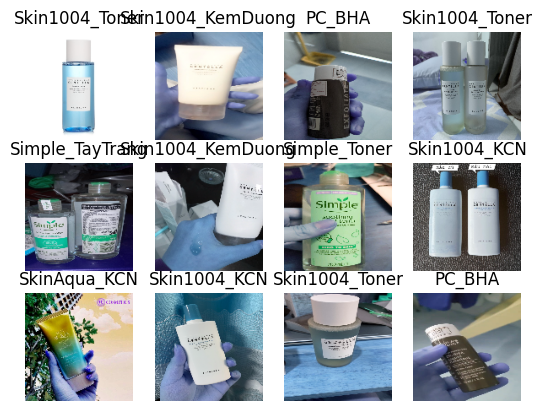

In [5]:
for imagePath in imagePaths:
    # print(imagePath)
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image,(WIDTH, HEIGHT)) #.flatten()
    data.append(image)
    label = imagePath[1]
    labels.append(label)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
# plt.show()

In [6]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)# random_state=30)

trainY = np_utils.to_categorical(trainY, len(categories))

In [7]:
EPOCHS = 20
INIT_LR = 1e-3
BS = 10
#--------------------------------------------
class_names = categories

In [8]:
from tensorflow.keras.applications import InceptionV3,MobileNet,VGG16,DenseNet121,EfficientNetB7#,DenseNet#EfficientNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras import layers
from keras import models

In [9]:
print("[INFO] compiling model...")
InceptionV3 = InceptionV3(input_shape=(WIDTH, HEIGHT, N_CHANNELS), include_top=False, weights='imagenet')
for layer in InceptionV3.layers:
    layer.trainable = False

model = Sequential()
model.add(InceptionV3)
#model.add(layers.AveragePooling2D((8, 8), padding='valid', name='avg_pool'))
model.add(GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(len(class_names), activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

[INFO] compiling model...
23502848/87910968 [=======>......................] - ETA: 34s

In [17]:
#Training
model.fit(trainX, trainY, batch_size=BS, epochs=EPOCHS, verbose=1)

Epoch 1/20
160/160 [==============================] - 11s 58ms/step - loss: 1.7661 - accuracy: 0.4313
Epoch 2/20
160/160 [==============================] - 8s 52ms/step - loss: 0.7248 - accuracy: 0.7351
Epoch 3/20
160/160 [==============================] - 8s 53ms/step - loss: 0.5415 - accuracy: 0.8054
Epoch 4/20
160/160 [==============================] - 8s 53ms/step - loss: 0.4379 - accuracy: 0.8475
Epoch 5/20
160/160 [==============================] - 8s 53ms/step - loss: 0.3718 - accuracy: 0.8707
Epoch 6/20
160/160 [==============================] - 8s 53ms/step - loss: 0.3392 - accuracy: 0.8876
Epoch 7/20
160/160 [==============================] - 8s 53ms/step - loss: 0.2835 - accuracy: 0.9046
Epoch 8/20
160/160 [==============================] - 11s 67ms/step - loss: 0.2603 - accuracy: 0.9083
Epoch 9/20
160/160 [==============================] - 10s 62ms/step - loss: 0.2265 - accuracy: 0.9146
Epoch 10/20
160/160 [==============================] - 9s 54ms/step - loss: 0.2219 - acc

13/13 [==============================] - 3s 158ms/step


C:\Users\Chikuka\AppData\Local\Temp\ipykernel_29188\3362605127.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Chikuka\AppData\Local\Temp\ipykernel_29188\3362605127.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


Text(0, 0.5, 'True')

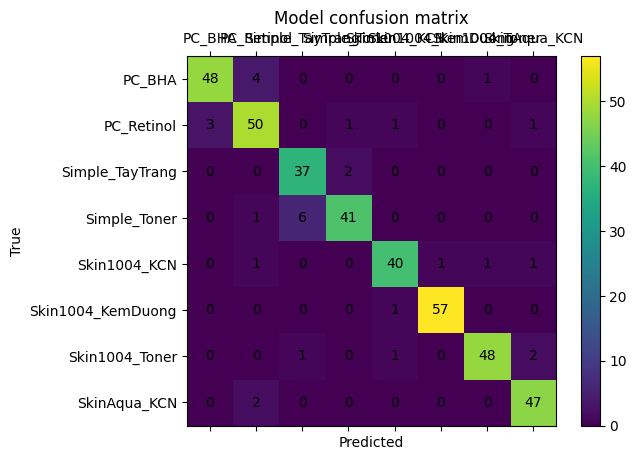

In [18]:
# ----------------------------danh gia mo hinh---------------------------------
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
# plt.show()

In [20]:
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))
print("\n")
# ----------------------------------------------

recall= recall_score(testY, predictions,average='weighted')
print("Recall :%.2f%%" % (recall*100))
print("\n")
# ----------------------------------------------

precision = precision_score(testY, predictions,average='weighted')
print("Precision : %.2f%%" % (precision*100.0))
print("\n")
# ----------------------------------------------

f1 = f1_score(testY, predictions,average='weighted')
print("F1 : %.2f%%" % (f1*100.0))
print("\n")

Accuracy : 92.23%


Recall :92.23%


Precision : 92.40%


F1 : 92.25%


